## Шаг 1. Загрузка файла с данными и изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
try:
    df = pd.read_csv('games.csv')
    print('local load successful')
except:
    print('local load failed, loading from the inernet')
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
display(df.sample(10))
display(df.info())
display(df.duplicated().sum())

local load successful


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN
7043,Critical Depth,PS,1997.0,Action,0.13,0.09,0.00,0.01,NaN,NaN,NaN
6730,UEFA Euro 2008 Austria-Switzerland,PSP,2008.0,Sports,0.06,0.12,0.00,0.06,NaN,NaN,NaN
9582,Star Wars: Clone Wars,XB,2003.0,Shooter,0.10,0.03,0.00,0.00,NaN,NaN,NaN
2056,Pokken Tournament,WiiU,2016.0,Fighting,0.50,0.26,0.17,0.08,76.0,8,E10+
15236,Kung Fu Panda,PC,2008.0,Action,0.00,0.02,0.00,0.00,71.0,7.8,E10+
11162,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,Action,0.08,0.00,0.00,0.01,39.0,6.4,T
1579,Tomb Raider: Underworld,PS3,2008.0,Action,0.45,0.55,0.05,0.22,75.0,7.2,T
8969,Summon Night 5,PSP,2013.0,Role-Playing,0.00,0.00,0.15,0.00,74.0,8.3,T
3932,My Word Coach,Wii,2007.0,Misc,0.46,0.01,0.00,0.04,68.0,tbd,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

0

### Первые наблюдения
в датасете данные по играм  
всего 16715 игр  
по 2 играм отсутствует название игры  
по нескольким играм отсутствует год релиза  
`user_score` тип строка, потому что в некоторых строках имеются значения `tbd`  
довольно много отсутствует значений оценок игроков и критиков
дублей нет и это очень хорошо

## Шаг 2. Подготовка данных

### План по исправлению / заполнению пропущенных данных
1) заменить заглавные буквы в названиях колонок на строчные
2) убрать записи без названия игры (их всего 2)
3) попробовать заполнить `year of release` и привести к типу `int`
4) `user_score` убрать `tbd` и привести к `float`
5) все `sales` и `score` привести к типу `float`
6) исследовать `score` на предмет возможности заполнения отсутствующих значений
7) исследовать `rating` на предмет возможности заполнения отсутствующих значений

In [3]:
df.columns = df.columns.str.lower()
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1923,Marvel vs. Capcom 3: Fate of Two Worlds,X360,2011.0,Fighting,0.79,0.18,0.03,0.07,NaN,NaN,NaN
2478,Dynasty Warriors 2,PS2,2000.0,Action,0.24,0.19,0.34,0.06,75.0,8.8,T
316,Dragon Warrior III,NES,1988.0,Role-Playing,0.10,0.00,3.77,0.00,NaN,NaN,NaN
15660,The Crew: Wild Run,PC,2015.0,Action,0.00,0.02,0.00,0.00,74.0,7.4,T
5876,Monster Truck Madness 64,N64,1999.0,Racing,0.24,0.06,0.00,0.00,NaN,NaN,NaN
1424,Gradius,NES,1986.0,Shooter,0.27,0.08,1.00,0.01,NaN,NaN,NaN
8947,Super Monkey Ball Deluxe,XB,2005.0,Misc,0.11,0.03,0.00,0.01,81.0,8.2,E
13598,FIFA Street 2,DS,2006.0,Sports,0.04,0.00,0.00,0.00,43.0,7.5,E
10014,Minute to Win It,DS,2010.0,Misc,0.11,0.00,0.00,0.01,NaN,tbd,E
1324,Tony Hawk's American Wasteland (Weekly america...,PS2,2005.0,Sports,1.38,0.05,0.00,0.02,NaN,NaN,NaN


In [4]:
df = df[~df.name.isna()]

In [5]:
len(df[df.year_of_release.isna()])/len(df)

0.016095255190570215

пропущенных значений `year of release` менее 2% от общего количества - можно удалить

In [6]:
df.dropna(subset=['year_of_release'], inplace=True)

In [7]:
df.loc[:,'year_of_release'] = df.loc[:,'year_of_release'].astype('int')

In [8]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

в `user_score` значения от 0.0 до 10.0

In [9]:
df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

в `critic_score` значения от 0.0 до 100.0

заменим пропущенные значения и `tbd` в `user_score` и `critic_score` на -1

In [10]:
df.loc[df.user_score == 'tbd','user_score'] = '-1'

In [11]:
df['user_score'].fillna('-1', inplace=True)

In [12]:
df.loc[:,'user_score'] = df.loc[:,'user_score'].astype('float')

In [13]:
df['critic_score'].fillna(-1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Рейтинги ESRB (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):  
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех». Первоначально "K-A"
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

In [15]:
df[df.rating.isna()].sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1688,Nuclear Strike,PS,1997,Simulation,0.66,0.45,0.00,0.08,-1.0,-1.0,NaN
12337,Nicola Kanshuu: Model * Oshare Audition,DS,2010,Misc,0.00,0.00,0.06,0.00,-1.0,-1.0,NaN
8539,Yu-Gi-Oh! 5D's Tag Force 6,PSP,2011,Strategy,0.00,0.00,0.16,0.00,-1.0,-1.0,NaN
15651,Miyako,PSP,2010,Adventure,0.00,0.00,0.02,0.00,-1.0,-1.0,NaN
7659,Bust-A-Move 2 Arcade Edition,PS,1995,Puzzle,0.11,0.07,0.00,0.01,-1.0,-1.0,NaN
2432,Street Fighter Alpha 2,PS,1996,Fighting,0.14,0.09,0.57,0.06,-1.0,-1.0,NaN
2253,Knockout Kings 2000,N64,1999,Fighting,0.63,0.27,0.00,0.02,-1.0,-1.0,NaN
16223,Tears to Tiara: Kakan no Daichi Portable,PSP,2010,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16222,SBK09 Superbike World Championship,PS3,2009,Racing,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
15687,Summon Night Granthese: Horobi no Ken to Yakus...,PS2,2010,Role-Playing,0.00,0.00,0.02,0.00,-1.0,-1.0,NaN


In [16]:
df.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

переназначим значения с небольшим количеством на близкие, но более преставленные группы, а пропущенные значения заполним значением RP - отражает суть - что у нас нет информации о рейтинге:  
- EC -> E
- K-A -> E
- AO -> M
- NaN -> RP

In [17]:
df.loc[df.rating == 'EC', 'rating'] = 'E'
df.loc[df.rating == 'K-A', 'rating'] = 'E'
df.loc[df.rating == 'AO', 'rating'] = 'M'
df['rating'].fillna('RP', inplace=True)

проверим результаты всех манипуляций с данными

In [18]:
df.rating.value_counts()

RP      6677
E       3932
T       2905
M       1537
E10+    1393
Name: rating, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [20]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

In [21]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2290,Street Fighter V,PS4,2016,Fighting,0.40,0.28,0.08,0.14,77.0,3.4,T,0.90
6780,Hasbro Family Game Night 3,PS3,2010,Misc,0.18,0.04,0.00,0.03,-1.0,-1.0,E,0.25
6370,Alundra 2: A New Legend Begins,PS,1999,Role-Playing,0.15,0.10,0.00,0.02,-1.0,-1.0,RP,0.27
8758,Cars: Race-O-Rama,X360,2009,Racing,0.14,0.01,0.00,0.01,54.0,5.8,E,0.16
10466,The Lord of the Rings: Conquest,DS,2009,Action,0.09,0.01,0.00,0.01,61.0,7.8,E10+,0.11
958,inFAMOUS 2,PS3,2011,Action,1.05,0.47,0.08,0.22,83.0,8.4,T,1.82
14272,The Sum of All Fears,GC,2003,Shooter,0.03,0.01,0.00,0.00,36.0,3.4,T,0.04
7261,Deadly Creatures,Wii,2009,Action,0.08,0.12,0.00,0.02,72.0,8.8,T,0.22
10902,Retro Game Challenge (US sales),DS,2007,Action,0.09,0.00,0.00,0.00,-1.0,-1.0,RP,0.09
6346,Rapala Pro Bass Fishing 2010,PS3,2010,Sports,0.18,0.05,0.00,0.03,-1.0,8.5,E,0.26


## Шаг 3. Исследовательский анализ данных

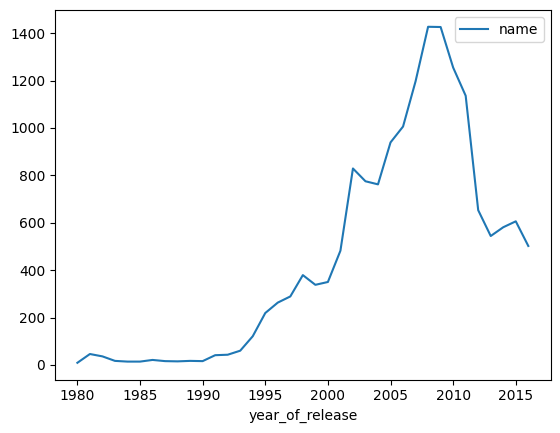

In [22]:
_ = df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot()

Вывод: до 2000 года игр выпускалось меньше, чем сейчас, играми до 2000 года можно пренебречь  
Однако точнее срез можно будет сделать посде анализа срока жизни игровой платформы

In [23]:
df.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

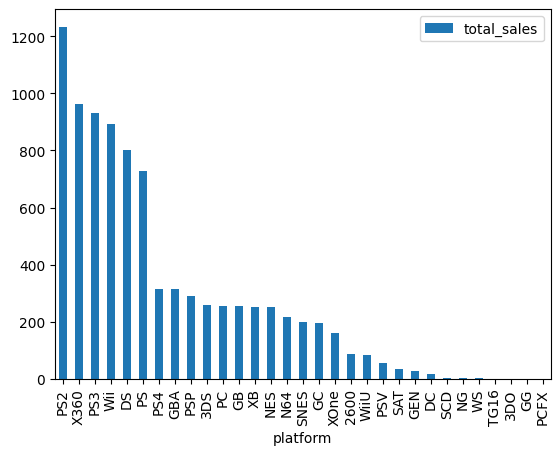

In [24]:
top_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
_ = top_sales.plot(kind='bar')

Видно, что с отрывом больше всего продаж приходится на 6 платформ, запомним их

In [25]:
top_platforms = top_sales.index[:6]
print(top_platforms)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')


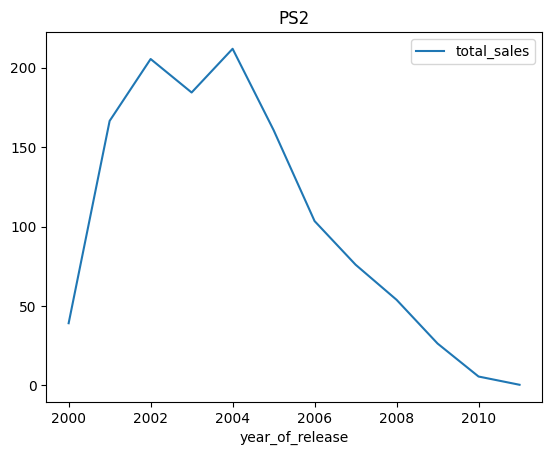

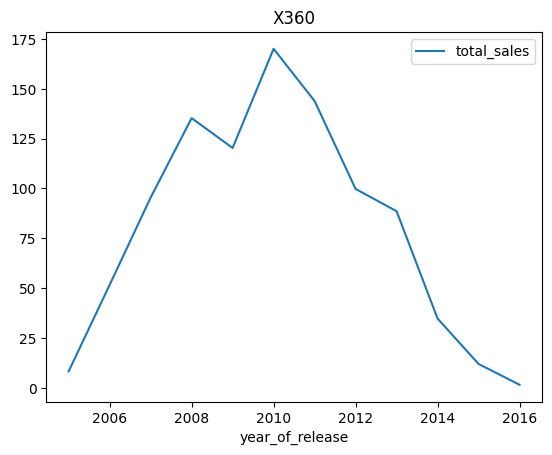

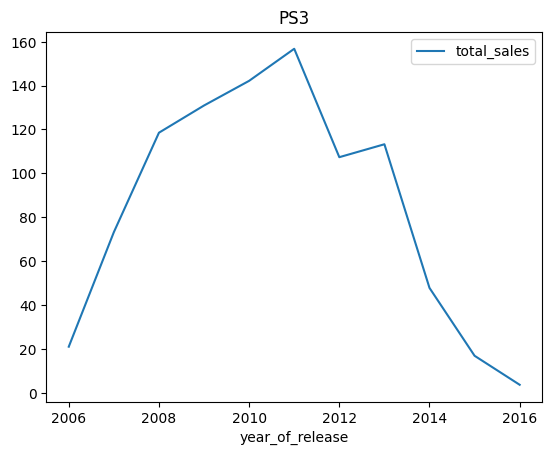

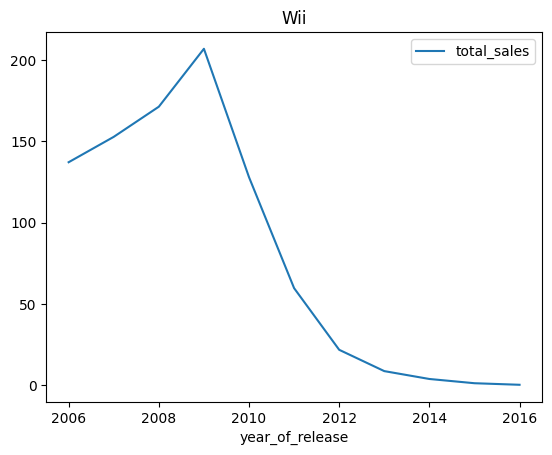

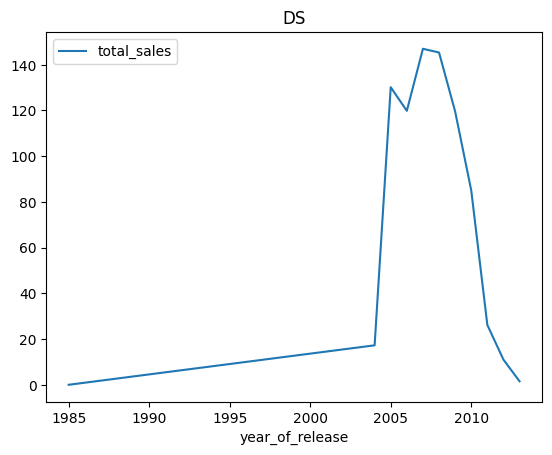

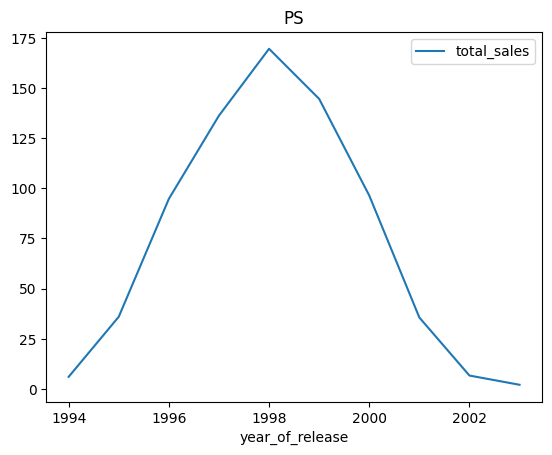

In [26]:
for platform in top_platforms:
    # print(platform)
    _ = df[df.platform == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot()
    plt.title(label=platform)
    plt.show()

Наблюдения:  
для типичной платформы характерен срок жизни, когда игры для нее начинают выпускаться и продаваться, достигают пика и падают в ноль, что обусловлено обновлением начинки самих приставок  
по PS2, PS3 и XBOX360 это срок можно ограничить 10 годами.  
Кроме того, есть платформы, игр для которых уже некоторое время вообще не выпускается (как и, вероятно, самих устройств)  
Разумный период даннях для предсказания не более 5 лет (половина срока жизни платформы, учитывая, что по всем платформам мы наблюдаем спад)  
Удалим из датасета данные до 2012 года и будем работать со свежими данными как с актуальными

In [27]:
df = df[df.year_of_release >= 2012]

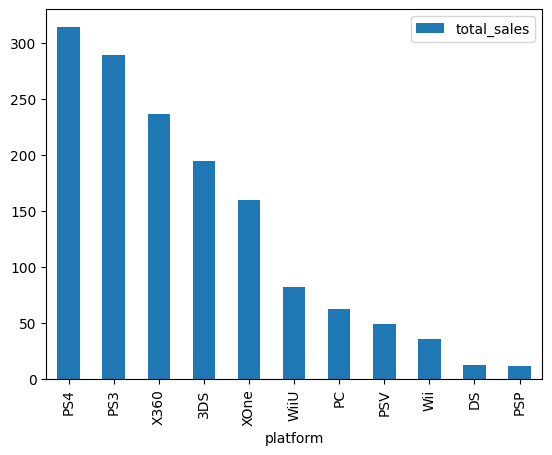

In [28]:
top_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
_ = top_sales.plot(kind='bar')

In [29]:
top_sales.index

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS',
       'PSP'],
      dtype='object', name='platform')

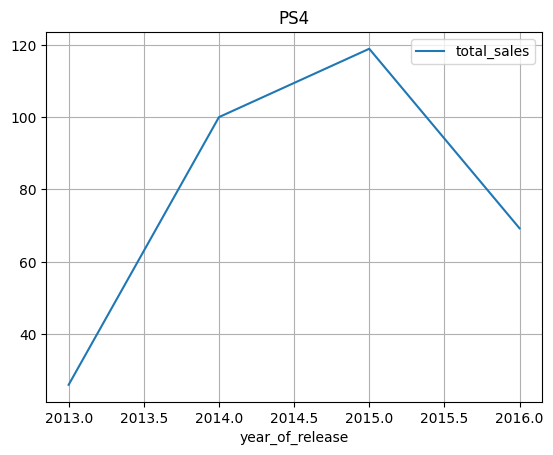

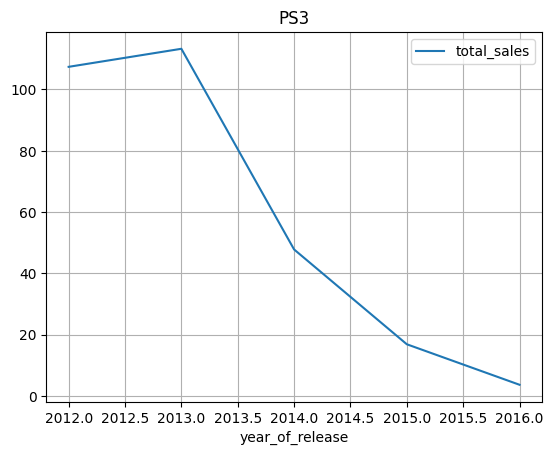

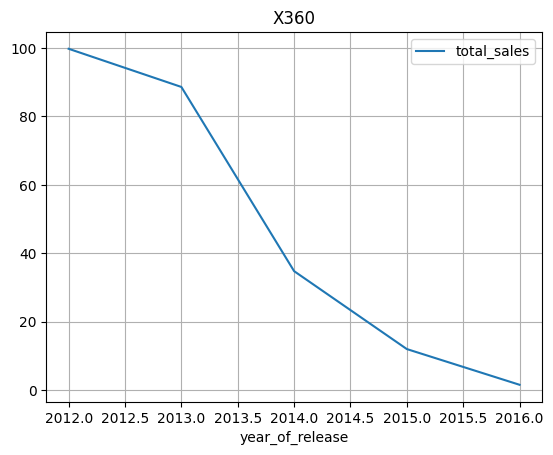

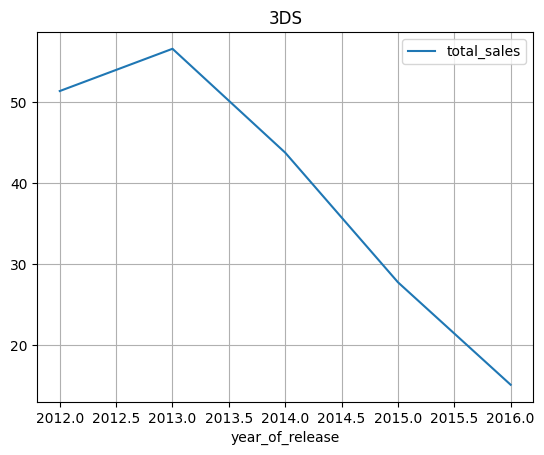

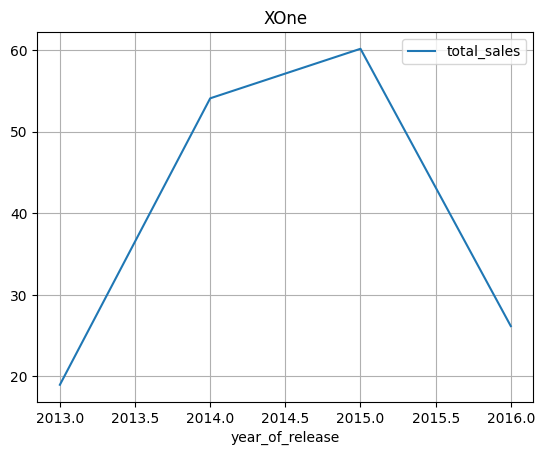

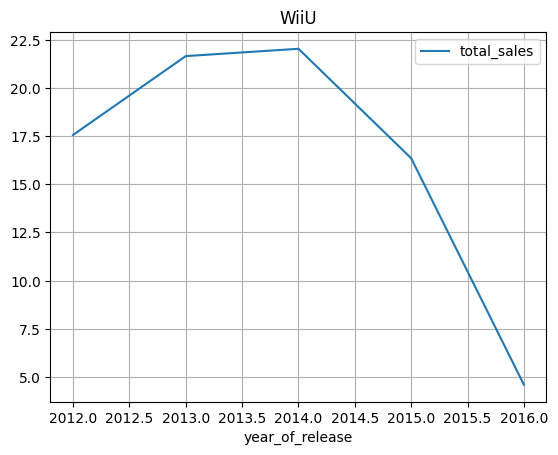

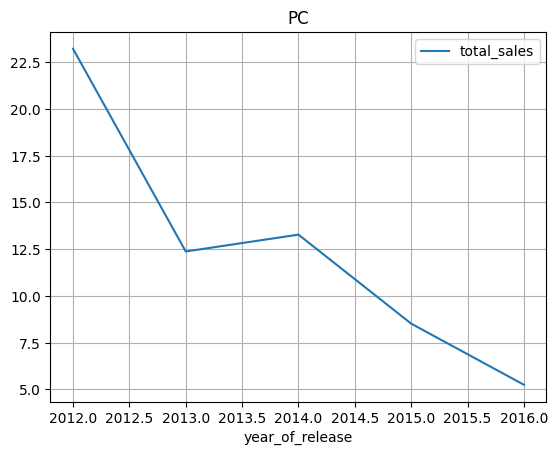

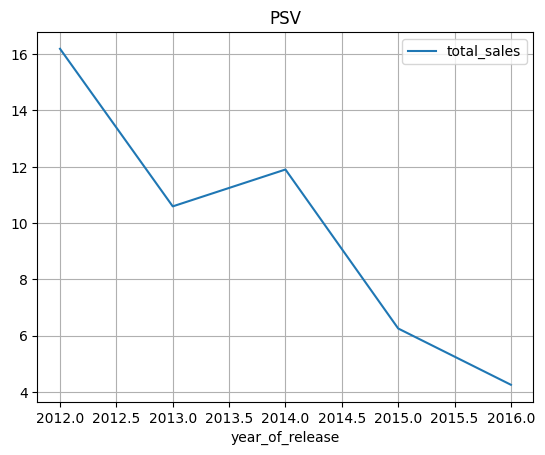

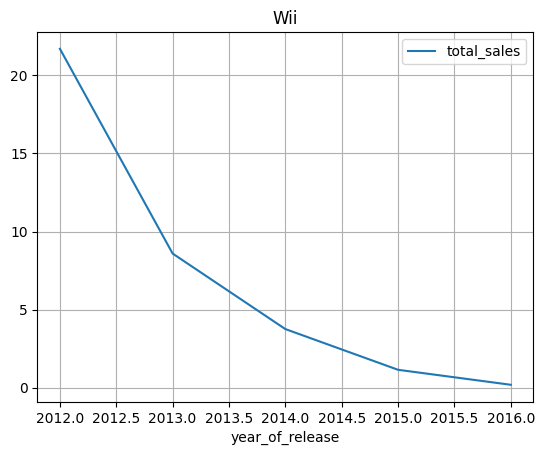

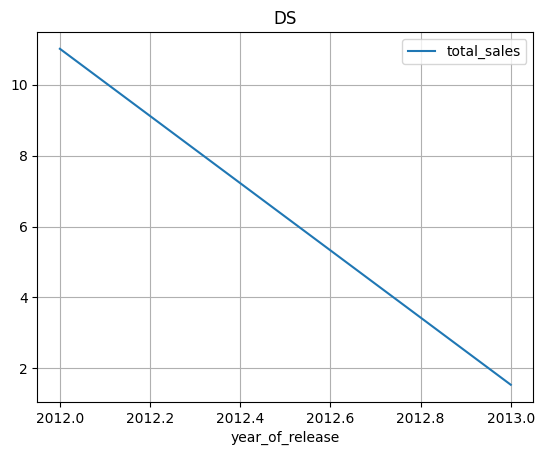

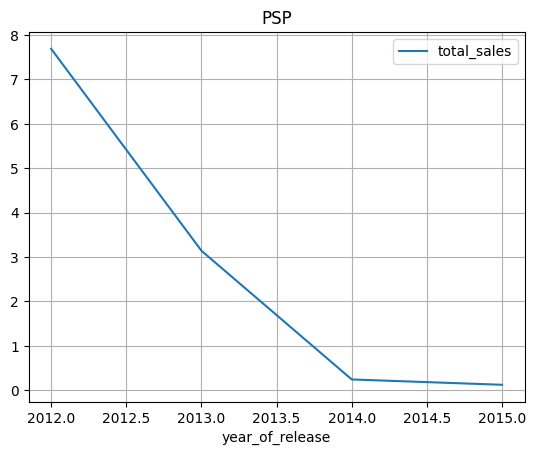

In [30]:
for platform in top_sales.index:
    _ = df[df.platform == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(grid=True)
    plt.title(label=platform)

не опускаются в ноль платформы:
- PS4
- 3DS
- XOne
- PC
- WiiU
- PSV  
продолжим только их рассматривать далее

In [31]:
actual_platforms = ['PS4', '3DS', 'XOne', 'PC', 'WiiU', 'PSV']

In [32]:
df = df[df.platform.isin(actual_platforms)]

(0.0, 2.0)

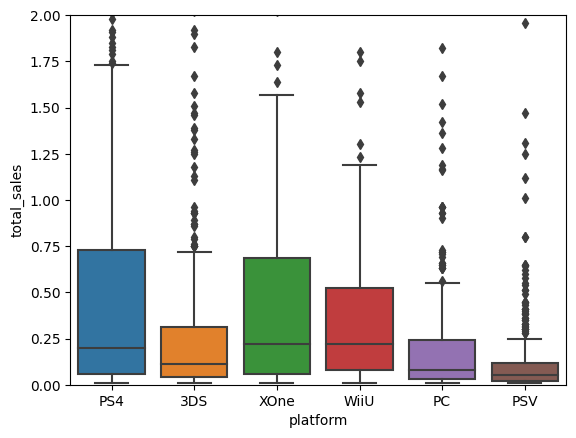

In [33]:
_ = sns.boxplot(x=df.platform, y=df.total_sales)
plt.ylim([0, 2])


Больше всего стабильных хитов продаж у PS4, XOne и WiiU, отстают 3DS и PC, редкие успехи демонстрирует платформа PSV

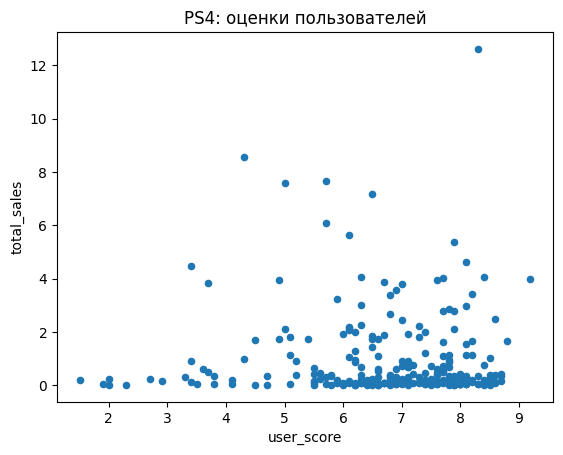

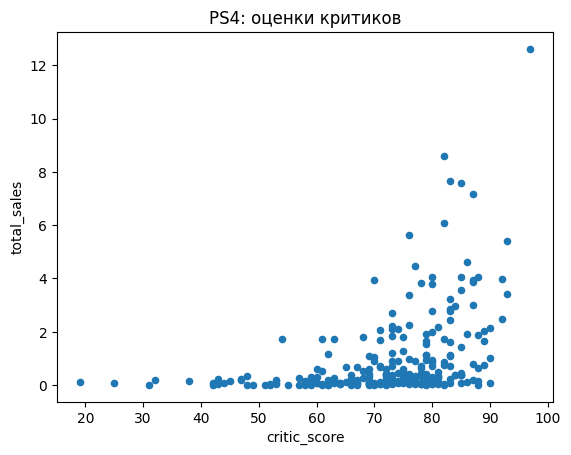

              total_sales  user_score  critic_score
total_sales      1.000000   -0.033625      0.405895
user_score      -0.033625    1.000000      0.557654
critic_score     0.405895    0.557654      1.000000


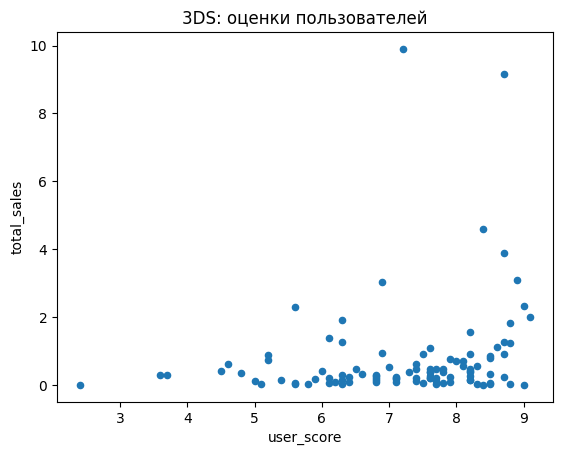

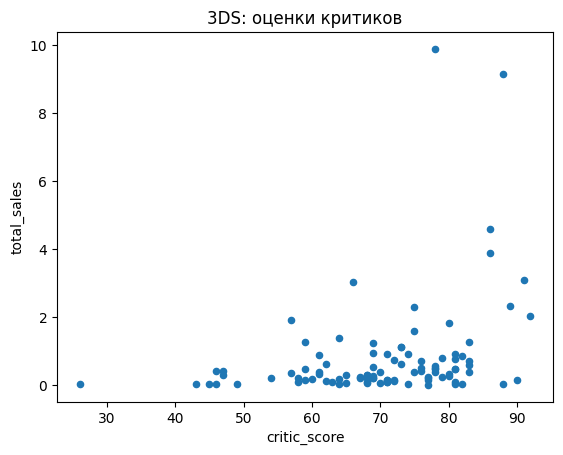

              total_sales  user_score  critic_score
total_sales      1.000000    0.201813      0.310553
user_score       0.201813    1.000000      0.722762
critic_score     0.310553    0.722762      1.000000


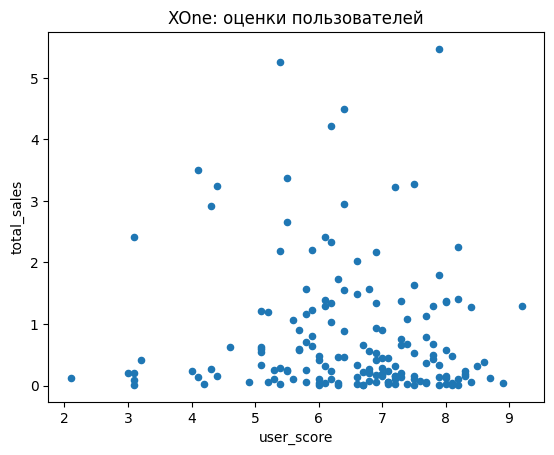

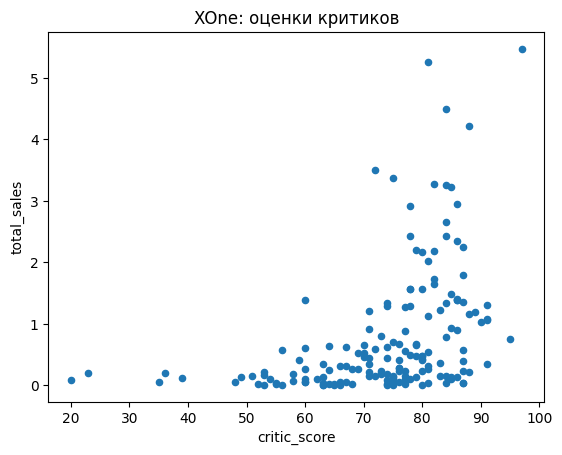

              total_sales  user_score  critic_score
total_sales      1.000000   -0.094003      0.410422
user_score      -0.094003    1.000000      0.472462
critic_score     0.410422    0.472462      1.000000


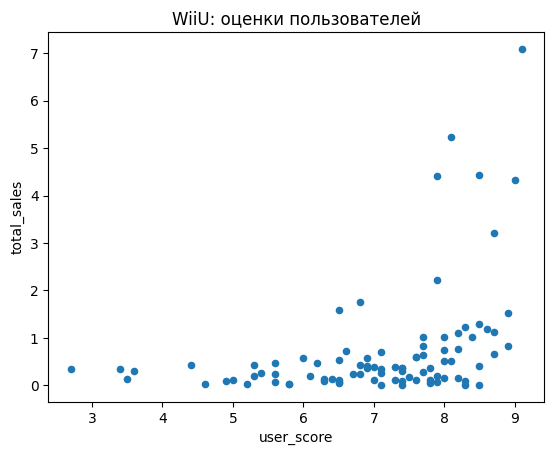

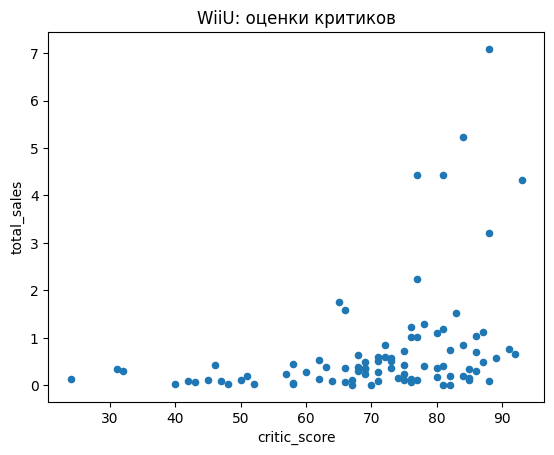

              total_sales  user_score  critic_score
total_sales      1.000000    0.391848      0.350882
user_score       0.391848    1.000000      0.770080
critic_score     0.350882    0.770080      1.000000


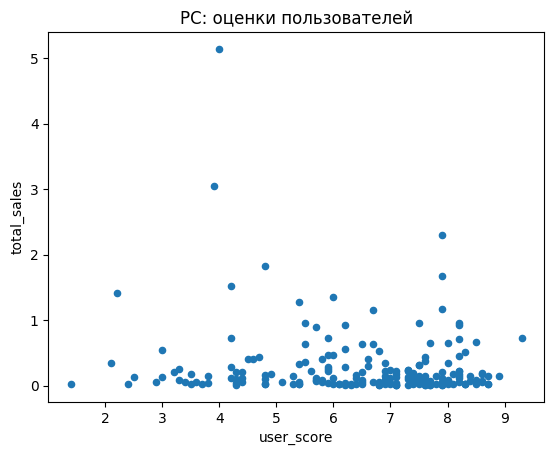

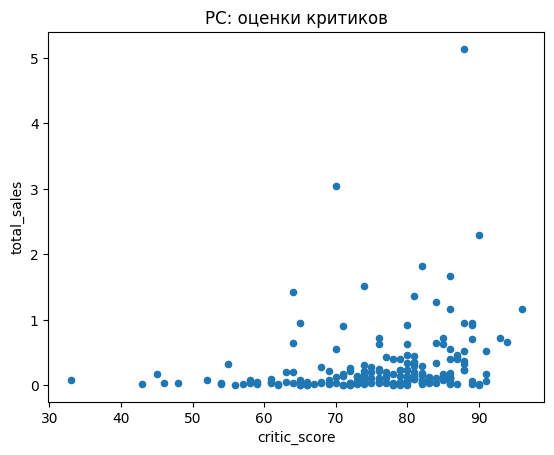

              total_sales  user_score  critic_score
total_sales      1.000000   -0.136934      0.236008
user_score      -0.136934    1.000000      0.432587
critic_score     0.236008    0.432587      1.000000


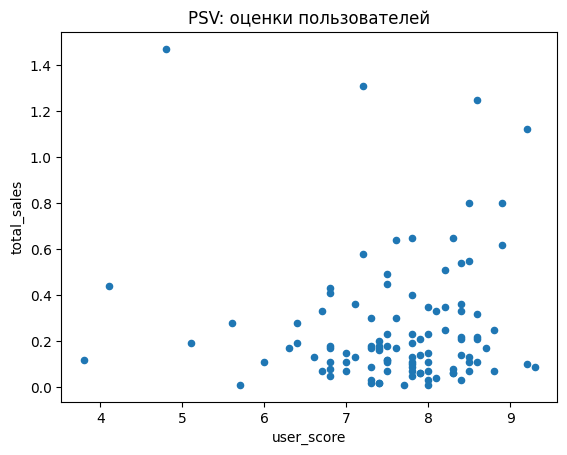

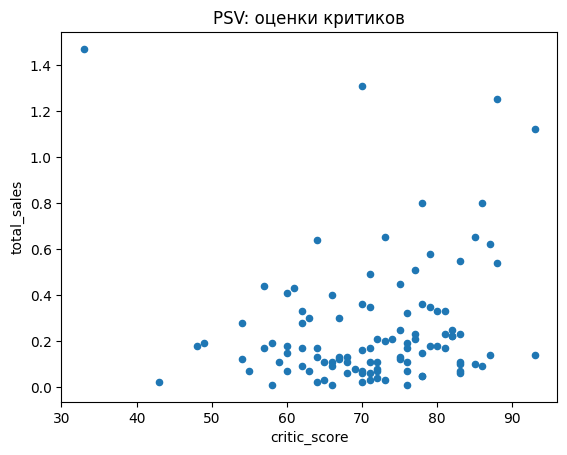

              total_sales  user_score  critic_score
total_sales      1.000000    0.013902      0.093988
user_score       0.013902    1.000000      0.699199
critic_score     0.093988    0.699199      1.000000


In [34]:
select_unmasked = (df.critic_score != -1) & (df.user_score != -1)
for platform in df.platform.unique():
    condition = (select_unmasked) & (df.platform == platform)
    _ = df[condition].plot(kind='scatter', x='user_score', y='total_sales')
    plt.title(label=platform + ': оценки пользователей')
    plt.show()
    _ = df[condition].plot(kind='scatter', x='critic_score', y='total_sales')
    plt.title(label=platform + ': оценки критиков')
    plt.show()
    print(df[condition][['total_sales', 'user_score', 'critic_score']].corr(method='pearson'))

Выводы:  
видно, что по всем платформам продажи демонстрируют слабую связь с оценками критиков и фактически никакой связи с оценками пользователей

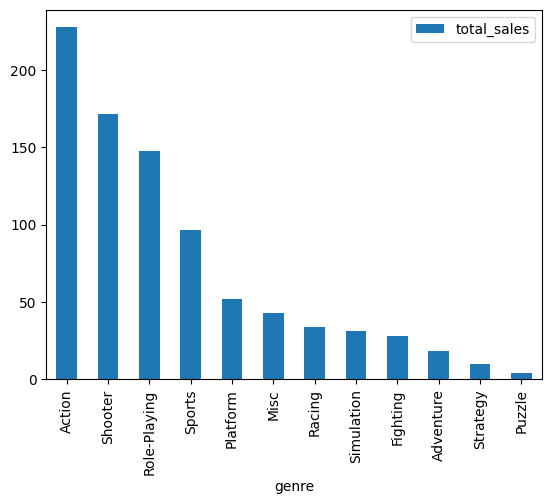

In [35]:
_ = df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot(kind='bar')

(0.0, 2.0)

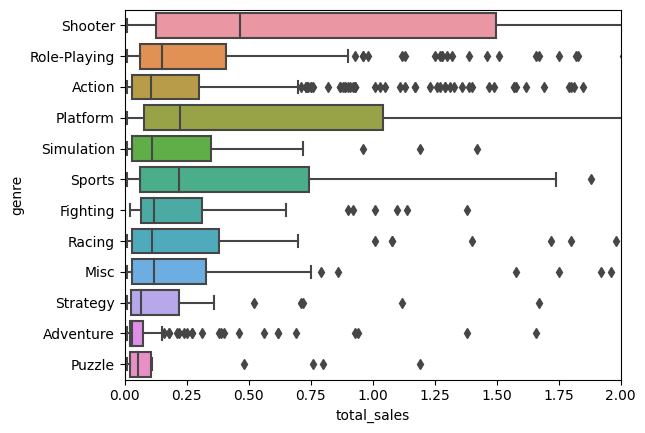

In [36]:
_ = sns.boxplot(x=df.total_sales, y=df.genre, orient='h')
plt.xlim([0, 2])

В целом заметно преобладание игр жанра Action, Shooter, Role-playing games и спортивных игр с точки зрения общих продаж, однако стабильнее выглядят Shooters, спортивные игры и платформенные игры

## Шаг 4. Составим портрет пользователя каждого региона

In [37]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    print(region[:2].upper())
    print(df.groupby('platform')[region].sum().sort_values(ascending=False))

NA
platform
PS4     108.74
XOne     93.12
3DS      55.31
WiiU     38.10
PC       19.12
PSV      10.98
Name: na_sales, dtype: float64
EU
platform
PS4     141.09
XOne     51.59
3DS      42.64
PC       37.76
WiiU     25.13
PSV      11.36
Name: eu_sales, dtype: float64
JP
platform
3DS     87.79
PSV     21.04
PS4     15.96
WiiU    13.01
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64


В регионах Северная Америка и Евросоюз лидерами по продажам являются платформы PS4, XOne, 3DS, WiiU и PC  
В Японии попурность платформ совсем иная: 3DS, PSV, PS4 и WiiU

In [38]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    print(region[:2].upper())
    print(df.groupby('genre')[region].sum().sort_values(ascending=False))

NA
genre
Action          85.40
Shooter         77.76
Role-Playing    46.92
Sports          38.71
Platform        20.82
Misc            16.11
Fighting        12.90
Racing          11.33
Simulation       6.34
Adventure        4.73
Strategy         3.22
Puzzle           1.13
Name: na_sales, dtype: float64
EU
genre
Action          83.00
Shooter         67.62
Sports          41.10
Role-Playing    38.48
Platform        17.81
Racing          16.75
Simulation      13.52
Misc            12.37
Fighting         7.00
Adventure        6.21
Strategy         4.40
Puzzle           1.31
Name: eu_sales, dtype: float64
JP
genre
Role-Playing    51.06
Action          34.26
Misc            10.53
Simulation       9.61
Platform         8.55
Adventure        5.49
Fighting         5.40
Shooter          4.69
Sports           3.95
Racing           1.71
Strategy         1.45
Puzzle           1.44
Name: jp_sales, dtype: float64


В регионах Северная Америка и Евросоюз лидерами по продажам являются жанры Action, Shooter, Role-playing, Sports  
В Японии популярность жанров совсем иная: Role-playing, Action, иное

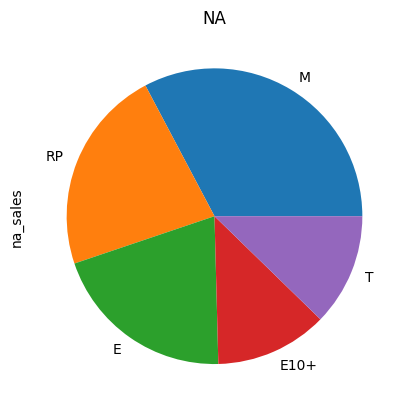

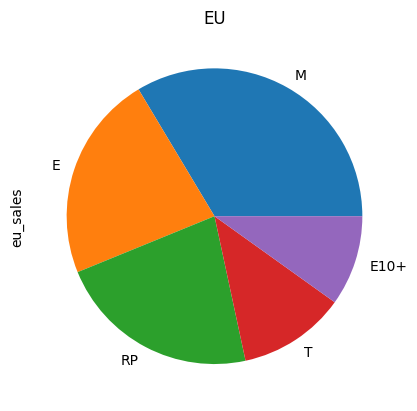

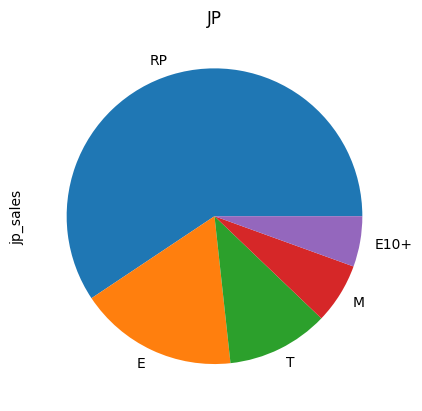

In [39]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for region in regions:
    _ = df.groupby('rating')[region].sum().sort_values(ascending=False).plot(kind='pie')
    plt.title(label=region[:2].upper())
    plt.show()

В регионах Северная Америка и Евросоюз лидируют продажи игр с рейтингом М (для взрослых) и примерно поровну игры без рейтинга и игры с рейтингом Е (для всех)  
В Японии иная картина: В основном продаются игры без рейтинга, на втром месте игры с рейтингом Е. Вероятно, это объясняется тем, что в Японии своя система рейтингов.

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Гипотеза H0: средний user_score платформы XOne равен среднему user_score платформы PC  
Гипотеза H1: средний user_score платформы XOne отличается от среднего user_score платформы PC

проверим с помощью st.ttest_ind

In [40]:
condition = df.user_score != -1
result = st.ttest_ind(a=df[(condition) & (df.platform == 'XOne')]['user_score'], b=df[(condition) & (df.platform == 'PC')]['user_score'], equal_var=False)

alpha = 0.05

print(f'p-value = {result.pvalue}')

print(f'с уровнем значимости {alpha} ', end='')

if result.pvalue < alpha:
    print('отвергаем гипотезу H0')
else:
    print('принимаем гипотезу H0')


p-value = 0.5489537965134912
с уровнем значимости 0.05 принимаем гипотезу H0


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC с уровнем значимости 5% не различаются

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные  
Гипотеза H0: средний user_score жанра Action равен среднему user_score жанра Sports  
Гипотеза H1: средний user_score жанра Action отличается от среднего user_score жанра Sports

проверим с помощью st.ttest_ind

In [41]:
condition = df.user_score != -1
result = st.ttest_ind(a=df[(condition) & (df.genre == 'Action')]['user_score'], b=df[(condition) & (df.genre == 'Sports')]['user_score'], equal_var=False)

alpha = 0.05

print(f'p-value = {result.pvalue}')

print(f'с уровнем значимости {alpha} ', end='')

if result.pvalue < alpha:
    print('отвергаем гипотезу H0')
else:
    print('принимаем гипотезу H0')


p-value = 1.9702408075214035e-11
с уровнем значимости 0.05 отвергаем гипотезу H0


Вывод: средние пользовательские рейтинги жанров Action и Sports значимо различаются (с уровнем значимости 5%)

## Общие результаты и выводы  

**Задача** состояла в выявлении закономерностей, определяющих успешность продажи компьютерных игр, на основании датасета от 2016, содержащего данные о продажах, жанрах, платформах, оценках игр.  

Была проведена первичная подготовка данных для анализа: удалена часть незначимых отсутствующих данных, восстановлена часть данных по оценкам и рейтингам игр.  

Был проведен первичный исследовательский анализ данныхи были выявлены следующие зависимости:
- Основные платформы, продающие игры: PS2, X360, PS3, Wii, DS, PS
- Установлено, что срок жизни платформы не превышает 10 лет, таким образом, количество актуальных данных для предсказания ограничивается 5 годами
- Исходя из этих данных, определены перспективные платформы для продаж игр: PS4, 3DS, XOne, PC, WiiU, PSV  
- Сконцентрироваться следует на платформах PS4, XOne и WiiU, поскольку на них выходят стабильные хиты продаж
- выявлено, что связи между оценками игр от критиков и пользователей и итоговыми продажами практически нет
- С точки зрения жанров игр, заметно преобладание в продажах игр жанров Action, Shooter, Role-playing games и спортивных игр, однако стабильнее с точки зрения высоких продаж выглядят Shooters, спортивные игры и платформенные игры

Был простроен портрет игрока в разных регионах. Отмечено, что в целом профиль игрока в Северной Америке совпадает с профилем европейца, но от них сильно отличается средний японский игрок:
- В регионах Северная Америка и Евросоюз:
  - лидерами по продажам являются платформы PS4, XOne, 3DS, WiiU и PC  
  - лидеры по жанрам: Action, Shooter, Role-playing, Sports  
  - лидируют по ретингам: М (для взрослых), примерно поровну игры без рейтинга и игры с рейтингом Е
- В Японии:
  - популярность платформ: 3DS, PSV, PS4 и WiiU
  - лидеры по жанрам: Role-playing, Action
  - привязка к рейтингу некорректна, т.к. в Японии своя независимая система рейтингов

Были статистически проверены 2 гипотезы (с уровнем значимости 5%):
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - ПРИНЯТА  
- Средние пользовательские рейтинги жанров Action и Sports разные - также ПРИНЯТА